<a href="https://colab.research.google.com/github/shubhangsrivastav/Machine-Learning-Projects/blob/main/project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.corr()['target'].sort_values(ascending=True)

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

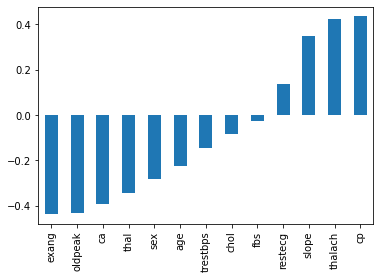

In [ ]:
df.corr()['target'][:13].sort_values().plot(kind='bar')

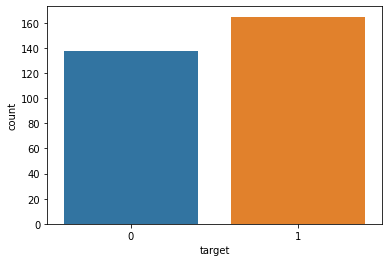

In [ ]:
sns.countplot(x=df['target'])

This shows  that the data is not biased 

In [ ]:
x = df.drop('target',axis=1)

In [ ]:
y = df['target'] 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=101)

Random state here used so that same set of data is used to train and test on model for each and every algorithm used so that we can compare accuracy of each algorithm

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred_lr =lr.predict(x_test);

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [ ]:
print(confusion_matrix(y_test,pred_lr))
print('\n')
print(classification_report(y_test, pred_lr))
print('Accuracy :'+ str(accuracy_score(y_test,pred_lr)*100) +' %' )


[[35  9]
 [ 2 45]]


              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.83      0.96      0.89        47

    accuracy                           0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91

Accuracy :87.91208791208791 %


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
acc_scores = []
for i in range(1,212):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_knn = knn.predict(x_test)
  acc_scores.append(accuracy_score(y_test,pred_knn))


Text(0, 0.5, 'Accuracy')

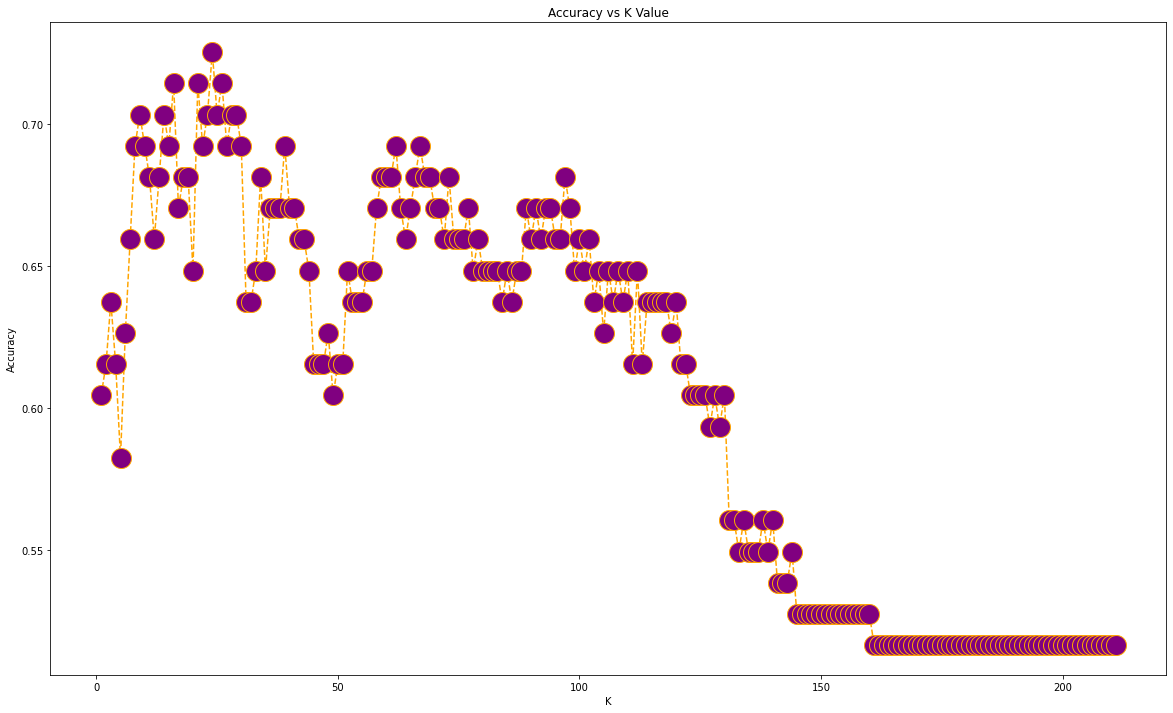

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(range(1,212),acc_scores,color='orange',linestyle='dashed',marker='o',markerfacecolor='purple',markersize=20)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
acc_scores.index(max(acc_scores))+1

24

In [ ]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))
print('Accuracy :'+ str(accuracy_score(y_test,pred_knn)*100) +' %' )


[[31 13]
 [12 35]]


              precision    recall  f1-score   support

           0       0.72      0.70      0.71        44
           1       0.73      0.74      0.74        47

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

Accuracy :72.52747252747253 %


DECISION TREES

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy')


In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
pred_dt = dt.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,pred_dt))
print('\n')
print(classification_report(y_test,pred_dt))
print('Accuracy :'+ str(accuracy_score(y_test,pred_dt)*100) +' %' )


[[32 12]
 [ 4 43]]


              precision    recall  f1-score   support

           0       0.89      0.73      0.80        44
           1       0.78      0.91      0.84        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Accuracy :82.41758241758241 %


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
para = {'n_estimators': [10,20,50,100,500,700,800,1600],'bootstrap':[True,False],'max_depth':[10,20,30,50,100]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator =rf, param_grid= para, n_jobs=-1, scoring='accuracy')

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 50, 100],
                         'n_estimators': [10, 20, 50, 100, 500, 700, 800,
                                          1600]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 30, 'n_estimators': 20}

In [ ]:
pred_rf_grid_search = grid_search.predict(x_test)

In [ ]:
grid_search.best_score_

0.8254706533776301

In [ ]:
print(confusion_matrix(y_test, pred_rf_grid_search))
print('\n')
print(classification_report(y_test, pred_rf_grid_search))
print('Accuracy :'+ str(accuracy_score(y_test,pred_rf_grid_search)*100) +' %' )


[[33 11]
 [ 7 40]]


              precision    recall  f1-score   support

           0       0.82      0.75      0.79        44
           1       0.78      0.85      0.82        47

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

Accuracy :80.21978021978022 %


SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()

In [ ]:
para = {'C':[0.0001,0.001,0.1,1,10,50,100,200,500,6000,100000],'gamma':[0.000001,0.001,0.01,0.1,1,10,50,100,200]}

In [ ]:
grid_search=GridSearchCV(SVC(),param_grid=para,refit=True,verbose=0)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 10, 50, 100, 200, 500,
                               6000, 100000],
                         'gamma': [1e-06, 0.001, 0.01, 0.1, 1, 10, 50, 100,
                                   200]})

In [ ]:
grid_search.best_params_

{'C': 100000, 'gamma': 1e-06}

In [ ]:
pred_svm_grid_search = grid_search.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, pred_svm_grid_search))
print('\n')
print(classification_report(y_test, pred_svm_grid_search))
print('Accuracy :'+ str(accuracy_score(y_test,pred_svm_grid_search)*100) +' %' )


[[33 11]
 [ 3 44]]


              precision    recall  f1-score   support

           0       0.92      0.75      0.83        44
           1       0.80      0.94      0.86        47

    accuracy                           0.85        91
   macro avg       0.86      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91

Accuracy :84.61538461538461 %


KMC

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=2)

In [ ]:
km.fit(x_train,y_train)

KMeans(n_clusters=2)

In [ ]:
pred_km =km.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, pred_km))
print('\n')
print(classification_report(y_test, pred_km))
print('Accuracy :'+ str(accuracy_score(y_test,pred_km)*100) +' %' )


[[21 23]
 [14 33]]


              precision    recall  f1-score   support

           0       0.60      0.48      0.53        44
           1       0.59      0.70      0.64        47

    accuracy                           0.59        91
   macro avg       0.59      0.59      0.59        91
weighted avg       0.59      0.59      0.59        91

Accuracy :59.34065934065934 %


ANN

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)

In [ ]:
x_test =scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x_train.shape

(212, 13)

In [ ]:
seq=Sequential()
seq.add(Dense(13,activation='relu'))
seq.add(Dense(20,activation='relu'))
seq.add(Dense(1,activation='sigmoid'))
seq.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
seq.fit(x=x_train,y=y_train,epochs=120,validation_data=(x_test,y_test))

Epoch 1/120
7/7 [==============================] - 1s 31ms/step - loss: 0.7304 - val_loss: 0.7129
Epoch 2/120
7/7 [==============================] - 0s 7ms/step - loss: 0.7159 - val_loss: 0.7035
Epoch 3/120
7/7 [==============================] - 0s 9ms/step - loss: 0.7047 - val_loss: 0.6957
Epoch 4/120
7/7 [==============================] - 0s 8ms/step - loss: 0.6969 - val_loss: 0.6893
Epoch 5/120
7/7 [==============================] - 0s 7ms/step - loss: 0.6893 - val_loss: 0.6832
Epoch 6/120
7/7 [==============================] - 0s 10ms/step - loss: 0.6828 - val_loss: 0.6769
Epoch 7/120
7/7 [==============================] - 0s 8ms/step - loss: 0.6759 - val_loss: 0.6701
Epoch 8/120
7/7 [==============================] - 0s 7ms/step - loss: 0.6685 - val_loss: 0.6631
Epoch 9/120
7/7 [==============================] - 0s 10ms/step - loss: 0.6611 - val_loss: 0.6551
Epoch 10/120
7/7 [==============================] - 0s 6ms/step - loss: 0.6525 - val_loss: 0.6458
Epoch 11/120
7/7 [========

In [ ]:
losses=pd.DataFrame(seq.history.history)

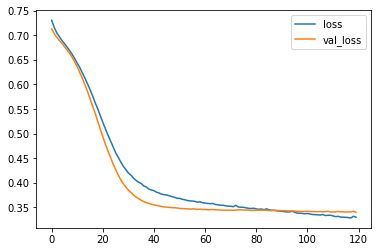

In [ ]:
losses.plot()

In [ ]:
pred_seq=seq.predict(x_test)

In [ ]:
final_pred=[]
for x in pred_seq:
  if x>0.5:
    final_pred.append([1])
  else:
    final_pred.append([0])  

final_pred=np.array(final_pred)



In [ ]:
print(confusion_matrix(y_test, final_pred))
print('\n')
print(classification_report(y_test,final_pred))
print('Accuracy :'+ str(accuracy_score(y_test,final_pred)*100) +' %' )


[[37  7]
 [ 4 43]]


              precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.86      0.91      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

Accuracy :87.91208791208791 %


CONCLUSION


OUT OF THE 7 ALGORITHM TESTED FOR THIS DATASET                                   
"LOGISTIC REGRESSION" and "ANN"GAVE THE BEST ACCURACY OF 87.91208791208791 %